 Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Dataset link - https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis

Lets Brief about The dataset , That Dataset is about chatgpt launch Tweets and its a 1 month tweets dataset with Sentiments.So I am going do a sentiment analysis lets how public opinion has been on chatgpt in a one month time.

In [1]:
# Starting with importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
data = pd.read_csv("/content/file.csv",encoding = 'utf-8')

In [3]:
data

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [4]:
data.describe(include = 'object')

,tweets,labels
count,219294,219294
unique,217622,3
top,ChatGPT,bad
freq,122,107796


In [5]:
data['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

It seems that in tweets sentiment data appears in bad(negative) reponse by the users

lets try visualize and see

<Axes: >

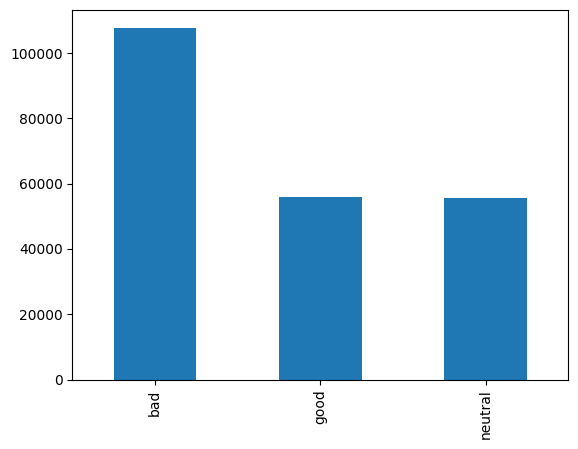

In [6]:
data['labels'].value_counts().plot(kind='bar')

As We see in the visualization tweets of chatgpt launch favours in Negative response

So We'll Try Sentiment analysis using Tokenization and after I'll use Sentiment analyzer

lets see what we'll get the results

Lets start with some Data manipulation

In [7]:
data.columns

Index(['Unnamed: 0', 'tweets', 'labels'], dtype='object')

In [8]:
data=data[[ 'labels','tweets' ]].copy()

In [9]:
data['tweets'].head(10)

0    ChatGPT: Optimizing Language Models for Dialog...
1    Try talking with ChatGPT, our new AI system wh...
2    ChatGPT: Optimizing Language Models for Dialog...
3    THRILLED to share that ChatGPT, our new model ...
4    As of 2 minutes ago, @OpenAI released their ne...
5    Just launched ChatGPT, our new AI system which...
6    As of 2 minutes ago, @OpenAI released their ne...
7    ChatGPT coming out strong refusing to help me ...
8    #0penAl just deployed a thing I've been helpin...
9    Research preview of our newest model: ChatGPT\...
Name: tweets, dtype: object

In [10]:
data.isna().sum()

labels    0
tweets    0
dtype: int64

In [11]:
data.dropna()

,labels,tweets
0,neutral,ChatGPT: Optimizing Language Models for Dialog...
1,good,"Try talking with ChatGPT, our new AI system wh..."
2,neutral,ChatGPT: Optimizing Language Models for Dialog...
3,good,"THRILLED to share that ChatGPT, our new model ..."
4,bad,"As of 2 minutes ago, @OpenAI released their ne..."
...,...,...
219289,bad,Other Software Projects Are Now Trying to Repl...
219290,good,I asked #ChatGPT to write a #NYE Joke for SEOs...
219291,bad,chatgpt is being disassembled until it can onl...
219292,bad,2023 predictions by #chatGPT. Nothing really s...


In [12]:
#lets remove any links in the tweets
import re
def remove_links(text):
    text = re.sub(r'https\S+','',text)
    return text

data['tweets'] = data['tweets'].apply(remove_links)

Now after removing links I am starting with NLP tokenization

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df = pd.DataFrame(data)
df['token_text']=df['tweets'].apply(word_tokenize)
df

,labels,tweets,token_text
0,neutral,ChatGPT: Optimizing Language Models for Dialog...,"[ChatGPT, :, Optimizing, Language, Models, for..."
1,good,"Try talking with ChatGPT, our new AI system wh...","[Try, talking, with, ChatGPT, ,, our, new, AI,..."
2,neutral,ChatGPT: Optimizing Language Models for Dialog...,"[ChatGPT, :, Optimizing, Language, Models, for..."
3,good,"THRILLED to share that ChatGPT, our new model ...","[THRILLED, to, share, that, ChatGPT, ,, our, n..."
4,bad,"As of 2 minutes ago, @OpenAI released their ne...","[As, of, 2, minutes, ago, ,, @, OpenAI, releas..."
...,...,...,...
219289,bad,Other Software Projects Are Now Trying to Repl...,"[Other, Software, Projects, Are, Now, Trying, ..."
219290,good,I asked #ChatGPT to write a #NYE Joke for SEOs...,"[I, asked, #, ChatGPT, to, write, a, #, NYE, J..."
219291,bad,chatgpt is being disassembled until it can onl...,"[chatgpt, is, being, disassembled, until, it, ..."
219292,bad,2023 predictions by #chatGPT. Nothing really s...,"[2023, predictions, by, #, chatGPT, ., Nothing..."


The tweets columns has been Tokenize

Now , after tokenization the next parts come of cleaning
by cleaning i mean removing any stopword , lemmatization , brackets, punctuation
npl has a modules for every cleaning step


First we remove any stopword in token column

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def remove_stopwords(words):
  # Set a variable for stopwords
  stop_word = set(stopwords.words('english'))
  # split the words in the text columns
  # iterate the every word and check it is a stopword or not
  filtered_words = [word for word in words if word.lower() not in stop_word and word.strip()]
  return (filtered_words)

df['text_words']=df['token_text'].apply(remove_stopwords)

In [17]:
df=df[['labels','text_words']].copy()

In [18]:
df

,labels,text_words
0,neutral,"[ChatGPT, :, Optimizing, Language, Models, Dia..."
1,good,"[Try, talking, ChatGPT, ,, new, AI, system, op..."
2,neutral,"[ChatGPT, :, Optimizing, Language, Models, Dia..."
3,good,"[THRILLED, share, ChatGPT, ,, new, model, opti..."
4,bad,"[2, minutes, ago, ,, @, OpenAI, released, new,..."
...,...,...
219289,bad,"[Software, Projects, Trying, Replicate, ChatGPT]"
219290,good,"[asked, #, ChatGPT, write, #, NYE, Joke, SEOs,..."
219291,bad,"[chatgpt, disassembled, dissemble]"
219292,bad,"[2023, predictions, #, chatGPT, ., Nothing, re..."


Now the lemmatization part

In [19]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
lemmatizer = WordNetLemmatizer()


def process_tokens(tokens):
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return {'lemmatized': lemmatized}

df[ 'lemmatized_text'] = df['text_words'].apply(lambda x: pd.Series(process_tokens(x)))

In [21]:
# lets start with cleaning the punctuation
# Cleaning round 1
def cleaning_r1(text):
  cleaned_tokens = []
  for item in text:
    item = item.lower()
    item = re.sub(r'[^\w\s]', '', item)  # Remove punctuation
    item = re.sub(r'\[.*?\]', '', item)  # Remove brackets and their content
    cleaned_tokens.append(item)
  return cleaned_tokens

df['clean_r1'] = df['lemmatized_text'].apply(cleaning_r1)

In [22]:
df

,labels,text_words,lemmatized_text,clean_r1
0,neutral,"[ChatGPT, :, Optimizing, Language, Models, Dia...","[ChatGPT, :, Optimizing, Language, Models, Dia...","[chatgpt, , optimizing, language, models, dial..."
1,good,"[Try, talking, ChatGPT, ,, new, AI, system, op...","[Try, talking, ChatGPT, ,, new, AI, system, op...","[try, talking, chatgpt, , new, ai, system, opt..."
2,neutral,"[ChatGPT, :, Optimizing, Language, Models, Dia...","[ChatGPT, :, Optimizing, Language, Models, Dia...","[chatgpt, , optimizing, language, models, dial..."
3,good,"[THRILLED, share, ChatGPT, ,, new, model, opti...","[THRILLED, share, ChatGPT, ,, new, model, opti...","[thrilled, share, chatgpt, , new, model, optim..."
4,bad,"[2, minutes, ago, ,, @, OpenAI, released, new,...","[2, minute, ago, ,, @, OpenAI, released, new, ...","[2, minute, ago, , , openai, released, new, ch..."
...,...,...,...,...
219289,bad,"[Software, Projects, Trying, Replicate, ChatGPT]","[Software, Projects, Trying, Replicate, ChatGPT]","[software, projects, trying, replicate, chatgpt]"
219290,good,"[asked, #, ChatGPT, write, #, NYE, Joke, SEOs,...","[asked, #, ChatGPT, write, #, NYE, Joke, SEOs,...","[asked, , chatgpt, write, , nye, joke, seos, d..."
219291,bad,"[chatgpt, disassembled, dissemble]","[chatgpt, disassembled, dissemble]","[chatgpt, disassembled, dissemble]"
219292,bad,"[2023, predictions, #, chatGPT, ., Nothing, re...","[2023, prediction, #, chatGPT, ., Nothing, rea...","[2023, prediction, , chatgpt, , nothing, reall..."


In [23]:
pip install emoji

In [24]:
# cleaning round 2
import string
import emoji
def round2_cleaning(text):
   emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F700-\U0001F77F"
                           u"\U0001F780-\U0001F7FF"
                           u"\U0001F800-\U0001F8FF"
                           u"\U0001F900-\U0001F9FF"
                           u"\U0001FA00-\U0001FA6F"
                           u"\U0001FA70-\U0001FAFF"
                           u"\U0001F004-\U0001F0CF"
                           u"\U0001F200-\U0001F251"
                           "]+", flags=re.UNICODE)
   cleaned_text = []
   for item in text:
    item = item.lower()
     # Remove punctuation
    item = ''.join([char for char in item if char not in string.punctuation])
    item = re.sub(emoji_pattern,'',item)
    cleaned_text.append(item)
   return cleaned_text
df['cleaned_Text'] = df['clean_r1'].apply(round2_cleaning)


In [25]:
df=df[['labels', 'clean_r1', 'cleaned_Text']].copy()

In [26]:
df

,labels,clean_r1,cleaned_Text
0,neutral,"[chatgpt, , optimizing, language, models, dial...","[chatgpt, , optimizing, language, models, dial..."
1,good,"[try, talking, chatgpt, , new, ai, system, opt...","[try, talking, chatgpt, , new, ai, system, opt..."
2,neutral,"[chatgpt, , optimizing, language, models, dial...","[chatgpt, , optimizing, language, models, dial..."
3,good,"[thrilled, share, chatgpt, , new, model, optim...","[thrilled, share, chatgpt, , new, model, optim..."
4,bad,"[2, minute, ago, , , openai, released, new, ch...","[2, minute, ago, , , openai, released, new, ch..."
...,...,...,...
219289,bad,"[software, projects, trying, replicate, chatgpt]","[software, projects, trying, replicate, chatgpt]"
219290,good,"[asked, , chatgpt, write, , nye, joke, seos, d...","[asked, , chatgpt, write, , nye, joke, seos, d..."
219291,bad,"[chatgpt, disassembled, dissemble]","[chatgpt, disassembled, dissemble]"
219292,bad,"[2023, prediction, , chatgpt, , nothing, reall...","[2023, prediction, , chatgpt, , nothing, reall..."


In [27]:
#let do one more time
def clean_text_with_regex(text):
   # Replace multiple commas with a single comma
    cleaned_text = re.sub(r',+', ',', text)
     # Remove leading and trailing commas
    cleaned_text = cleaned_text.strip(',')
    return cleaned_text

df['round4'] = df['cleaned_Text'].apply(lambda x: clean_text_with_regex(str(x).encode("utf-8").decode("utf-8")))

In [29]:
df.columns

Index(['labels', 'clean_r1', 'cleaned_Text', 'round4'], dtype='object')

In [30]:
df=df[['labels', 'round4']]

As you can see the after cleaning ,starting with sentiment analyzer

In [31]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/126.0 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 122.9/126.0 kB 3.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores using VADER
df['vader_sentiment_score'] = df['round4'].apply(lambda x: analyzer.polarity_scores(' '.join(x))['compound'])

df['vader_sentiment'] = df['vader_sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


<ipython-input-32-d56ae56e5595>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vader_sentiment_score'] = df['round4'].apply(lambda x: analyzer.polarity_scores(' '.join(x))['compound'])


In [33]:
df

,labels,round4,vader_sentiment_score,vader_sentiment
0,neutral,"['chatgpt', '', 'optimizing', 'language', 'mod...",0.8402,positive
1,good,"['try', 'talking', 'chatgpt', '', 'new', 'ai',...",0.8402,positive
2,neutral,"['chatgpt', '', 'optimizing', 'language', 'mod...",0.9849,positive
3,good,"['thrilled', 'share', 'chatgpt', '', 'new', 'm...",0.9517,positive
4,bad,"['2', 'minute', 'ago', '', '', 'openai', 'rele...",0.4588,positive
...,...,...,...,...
219289,bad,"['software', 'projects', 'trying', 'replicate'...",0.4588,positive
219290,good,"['asked', '', 'chatgpt', 'write', '', 'nye', '...",0.9517,positive
219291,bad,"['chatgpt', 'disassembled', 'dissemble']",0.7184,positive
219292,bad,"['2023', 'prediction', '', 'chatgpt', '', 'not...",0.8402,positive


In [34]:
df['vader_sentiment'].value_counts()

positive    184725
neutral      34569
Name: vader_sentiment, dtype: int64

We seeing that after useing sentiment analyzer the negative response is 0
The analysis of tweets response is only had positive and neutral sentiment

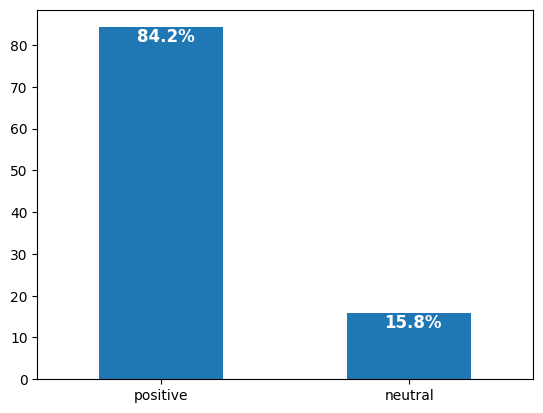

In [35]:
ax = (df['vader_sentiment'].value_counts()*100.0/len(df)).plot(kind='bar',stacked=True,rot = 0)
totals=[]

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15,i.get_height()-3.5,\
           str(round((i.get_height()/total),1))+'%',
           fontsize = 12,
            color = 'white',
           weight = 'bold')

OK so we have a very positive response by the users in the Tweets by the launch of chat gpt within a month and its 82.2%

lets test our model accuracy

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df['vader_sentiment_score'].values.reshape(-1, 1)
y = df['vader_sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


The model accuray is 100%